In [14]:
# Importación de las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [15]:
df = pd.read_csv("../data/dataset_clean.csv")

### Selección de las columnas para X (independiente) e Y (dependiente)


In [16]:
X = df[['Ozone AQI Value']]  # Variable independiente
Y = df['PM2.5 AQI Value']    # Variable dependiente


### Análisis de distribución de las variables

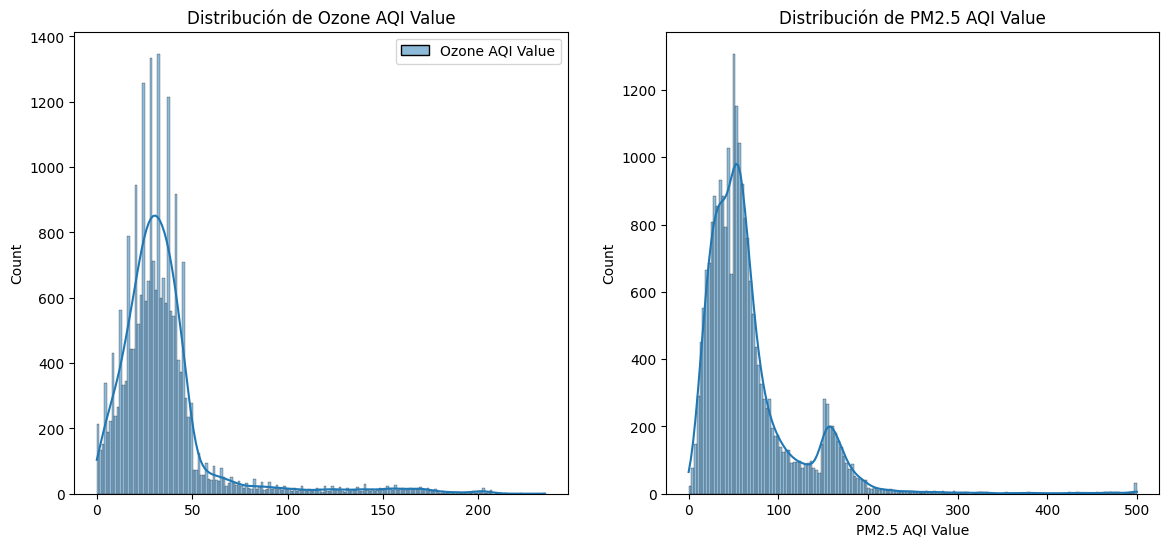

In [17]:
plt.figure(figsize=(14, 6))

# Distribución de la variable X (Ozone AQI Value)
plt.subplot(1, 2, 1)
sns.histplot(X, kde=True)
plt.title('Distribución de Ozone AQI Value')

# Distribución de la variable Y (PM2.5 AQI Value)
plt.subplot(1, 2, 2)
sns.histplot(Y, kde=True)
plt.title('Distribución de PM2.5 AQI Value')

plt.show()


### Gráfico de dispersión entre Ozone AQI y PM2.5 AQI


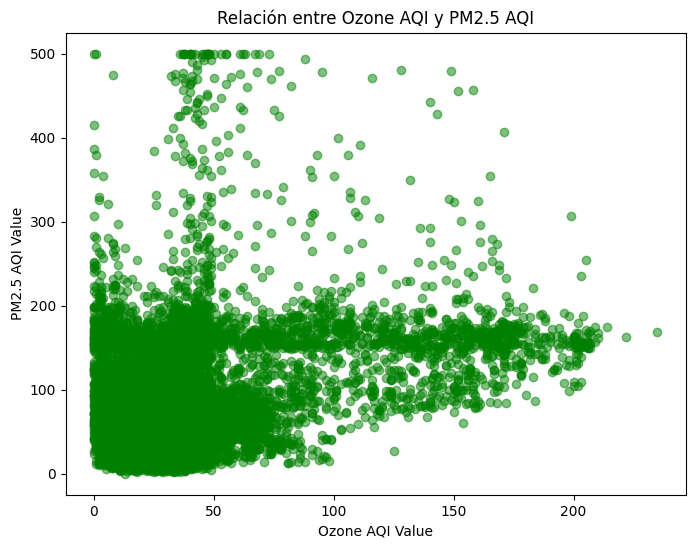

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, color='green')
plt.title('Relación entre Ozone AQI y PM2.5 AQI')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()


### Planteamiento del Modelo de Regresión Lineal

In [19]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Se crea el modelo de regresión lineal
model = LinearRegression()

# Se ajusta el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Predicciones con los datos de prueba
Y_pred = model.predict(X_test)

# Mostrar los coeficientes de la regresión
print("Coeficiente (pendiente):", model.coef_[0])
print("Intersección (ordenada en el origen):", model.intercept_)


Coeficiente (pendiente): 0.6551942828418219
Intersección (ordenada en el origen): 45.543357633161065


### Calculando los valores de los coeficientes

In [20]:
# Calcular el coeficiente y la intersección
pendiente = model.coef_[0]
interseccion = model.intercept_

print(f"El valor del coeficiente es: {pendiente}")
print(f"El valor de la intersección es: {interseccion}")


El valor del coeficiente es: 0.6551942828418219
El valor de la intersección es: 45.543357633161065


### Calcular el coeficiente de correlación de Pearson (r)

In [22]:
r, _ = pearsonr(X['Ozone AQI Value'], Y)

### Mostrar la ecuación de la recta Y el valor de r

In [23]:
print(f"Ecuación de la recta: Y = {interseccion:.2f} + {pendiente:.2f}X")
print(f"Coeficiente de correlación (r): {r:.2f}")

Ecuación de la recta: Y = 45.54 + 0.66X
Coeficiente de correlación (r): 0.34


### Evaluación del modelo

In [9]:

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")


Error Cuadrático Medio (MSE): 2816.19686733953
Coeficiente de Determinación (R²): 0.1174933821055496


### Visualización del Modelo de Regresión

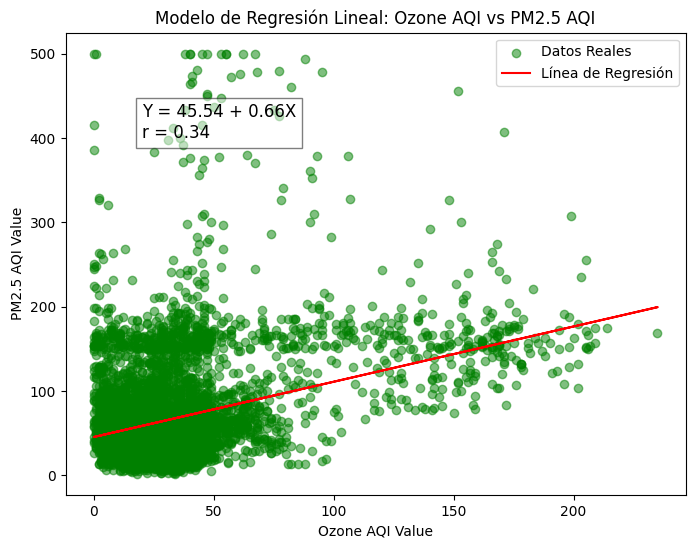

In [25]:
# Gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='green', alpha=0.5, label='Datos Reales')
plt.plot(X_test, Y_pred, color='red', label='Línea de Regresión')

# Mostrar la ecuación y el valor de r en el gráfico
equation_text = f"Y = {interseccion:.2f} + {pendiente:.2f}X\nr = {r:.2f}"
plt.text(20, 400, equation_text, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Personalizar el gráfico
plt.title('Modelo de Regresión Lineal: Ozone AQI vs PM2.5 AQI')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.legend()
plt.show()